# Trabajando con datos externos con SciPy: Ejercicios propuestos

## 1. Cargar datos con pandas

In [1]:
from urllib import urlretrieve
link = 'https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv'
urlretrieve(link, "churn.txt")

('churn.txt', <httplib.HTTPMessage instance at 0x0000000003D81B88>)

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("churn.txt")
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### 1.1 Seleccionar tres campos numéricos del dataset, diferentes de las vistas en clase.

In [165]:
# Let's read all the dataset now for the three columns:
df = pd.read_csv("churn.txt", usecols=["VMail Message","Night Mins","Night Charge","State","Churn?"])

# Convert Churn to boolean:
def change1(value):
    return value == "True."

df["Churn?"] = df["Churn?"].map(change1)

print df["Churn?"].dtype
df.head(3)

bool


,State,VMail Message,Night Mins,Night Charge,Churn?
0,KS,25,244.7,11.01,False
1,OH,26,254.4,11.45,False
2,NJ,0,162.6,7.32,False


### 1.2 Comprobar si tienen correlaciones entre ellos, consultando una medida de correlación primero, y después tratando de hacer una regresión lineal.

In [163]:
df.corr()

,VMail Message,Night Mins,Night Charge,Churn?
VMail Message,1.000000,0.007681,0.007663,-0.089728
Night Mins,0.007681,1.000000,0.999999,0.035493
Night Charge,0.007663,0.999999,1.000000,0.035496
Churn?,-0.089728,0.035493,0.035496,1.000000


Podemos ver que las variables Night Mins y Night Fare estan muy correladas entre si. Sin embargo, no guardan relacion apreciable con la variable VMail Message.

In [198]:
from sklearn import linear_model
X_mins = df[["VMail Message","Night Mins"]]
X_charge = df[["VMail Message","Night Charge"]]
y = df["Churn?"]

# Entrenamos el modelo tomando dos variables:
lm_mins = linear_model.LinearRegression()
lm_mins.fit(X_mins, y)
print lm_mins.coef_

# Entrenamos el modelo tomando dos variables:
lm_charge = linear_model.LinearRegression()
lm_charge.fit(X_charge, y)
print lm_charge.coef_

[-0.00231497  0.00025189]
[-0.00231495  0.0055977 ]


Creamos dos modelos diferentes, cada uno con una de las 2 variables correladas. Cabe esperar que tengan un comportamiento similar.

In [196]:
print "Regresion lineal con Night Mins: %f" % lm_mins.score(X_mins, y)
print "Regresion lineal con Night Charge: %f" % lm_charge.score(X_charge, y)

Regresion lineal con Night Mins: 0.009360
Regresion lineal con Night Charge: 0.009360


En efecto, podemos comprobar como ambos modelos ofrecen un comportamiento identico. En este caso, el modelo escogido nos ofrece un comportamiento muy pobre a la hora de predecir la variable objetivo Churn?

### 1.3 Observar la distribución de los atributos numéricos. Alguno parece una distribución conocida?

(array([   1.,    0.,    0.,    0.,    0.,    2.,    1.,    2.,    3.,
           2.,    3.,    3.,    3.,    5.,    8.,    7.,    3.,    8.,
           3.,   13.,   10.,   20.,   12.,   25.,   19.,   27.,   31.,
          19.,   45.,   35.,   42.,   48.,   51.,   58.,   71.,   62.,
          70.,   63.,   83.,  101.,   77.,   80.,  110.,   77.,   82.,
         122.,  101.,   67.,   96.,   98.,   96.,  110.,   79.,   85.,
          96.,   85.,   72.,   71.,   75.,   76.,   57.,   60.,   69.,
          48.,   61.,   38.,   44.,   22.,   19.,   37.,   23.,   25.,
          17.,   13.,   11.,   14.,   10.,   12.,    5.,    2.,    7.,
           4.,    3.,    3.,    0.,    0.,    3.,    3.,    2.,    1.,
           0.,    2.,    1.,    0.,    0.,    1.,    1.,    0.,    0.,    1.]),
 array([  1.04  ,   1.2073,   1.3746,   1.5419,   1.7092,   1.8765,
          2.0438,   2.2111,   2.3784,   2.5457,   2.713 ,   2.8803,
          3.0476,   3.2149,   3.3822,   3.5495,   3.7168,   3.8841,
      

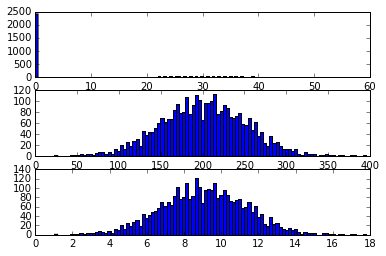

In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.subplot(311)
plt.hist(df["VMail Message"], bins=100)
plt.subplot(312)
plt.hist(df["Night Mins"], bins=100)
plt.subplot(313)
plt.hist(df["Night Charge"], bins=100)

In [39]:
from scipy.stats.mstats import normaltest
_, pval1 = normaltest(df["VMail Message"])
_, pval2 = normaltest(df["Night Mins"])
_, pval3 = normaltest(df["Night Charge"])

print pval1, pval2, pval3

1.53929417761e-121 0.583992258303 0.585081439679


Si el p-valor es muy pequeño, significa que no es probable que los datos vengan de una distribucion normal.
Podemos ver como la variable VMail Message no proviene de una distribucion normal, mientras que las otras 2 variables si se asemejan.

### 1.4 Comprobar si el dataset está balanceado, es decir, la proporción (en porcentaje) de files en las que Churn? Es Yes respecto a las que es No.

In [40]:
those_who_churned = df[df["Churn?"]]
those_who_not_churned = df[np.logical_not(df["Churn?"].values)]
print len(those_who_churned), len(those_who_not_churned)

483 2850


El dataset no esta balanceado. Hay una gran mayoria (1:5) de valores No para la variable Churn?

### 1.5 Examinar el campo “State”. ¿Cuántos valores diferentes tiene? Contar el número de veces que Churn?=Yes. para cada estado, para observar si tiene alguna influencia

In [204]:
df[['State']].describe()

,State
count,3333
unique,51
top,WV
freq,106


Vemos que hay 51 valores diferentes

In [274]:
by_state = df.loc[df['Churn?'] == True].groupby(['State'])['State'].count()
by_state

State
AK        3
AL        8
AR       11
AZ        4
CA        9
CO        9
CT       12
DC        5
DE        9
FL        8
GA        8
HI        3
IA        3
ID        9
IL        5
IN        9
KS       13
KY        8
LA        4
MA       11
MD       17
ME       13
MI       16
MN       15
MO        7
MS       14
MT       14
NC       11
ND        6
NE        5
NH        9
NJ       18
NM        6
NV       14
NY       15
OH       10
OK        9
OR       11
PA        8
RI        6
SC       14
SD        8
TN        5
TX       18
UT       10
VA        5
VT        8
WA       14
WI        7
WV       10
WY        9
Name: State, Length: 51, dtype: int64

No parece que haya ninguna influencia

## 2. Trabajo con XML

Parseamos uno de los ficheros XML

In [293]:
from lxml import objectify
parsed = objectify.parse('fa.xml')
root = parsed.getroot()

print root.tag
print root.attrib
print root.countchildren()

country=[]
name=[]
unit =[]
year=[]
amount=[]
kind =[]
program = []
for row in root.ForeignAssistanceRow:
    country.append(row.RecipientCountry.text)
    name.append(row.ProgramName.text)
    unit.append(row.UnitName.text)
    year.append(row.FiscalYear.text)
    amount.append(row.Obligations.text)
    kind.append(row.AssistanceType.text)
    program.append(row.ProgramName.text)
print len(country), len(name), len(unit), len(year), len(amount)

ForeignAssistance
{}
8278
8278 8278 8278 8278 8278


Importamos la informacion en un DataFrame

In [229]:
import pandas as pd
data = pd.DataFrame()
data['country'] = country
data['name'] = name
data['unit'] = unit
data['year'] = year
data['amount'] = amount
data['type'] = kind
data['program'] = program

# Always remember to check types and convert if needed:
print type(data['amount'][0])
data['amount'] = pd.Series(amount, dtype="int64") # En mi PC es necesario convertirlo a int64 o da error!
print type(data['amount'][0])

data.head(5)

<type 'str'>
<type 'numpy.int64'>


,country,name,unit,year,amount,type,program
0,Afghanistan,Child Survival and Health,Constant 2011 $US,2002,2691390,Economic,Child Survival and Health
1,Afghanistan,Child Survival and Health,Constant 2011 $US,2003,58817159,Economic,Child Survival and Health
2,Afghanistan,Child Survival and Health,Constant 2011 $US,2004,41877130,Economic,Child Survival and Health
3,Afghanistan,Child Survival and Health,Constant 2011 $US,2005,41467658,Economic,Child Survival and Health
4,Afghanistan,Child Survival and Health,Constant 2011 $US,2006,42463433,Economic,Child Survival and Health


### 2.1 Comprobar los tipos de ayuda diferentes que existen. Nota: está en el elemento AssistanceType

In [228]:
data.groupby(['type'])['type'].count()

type
Economic    8278
Name: type, dtype: int64

Vemos que solo hay un tipo de ayuda para todos los registros, Economic

### 2.2 Dibujar los 5 años que USA ha dado más cantidad de ayuda internacional y los 5 que menos, en unidades monetarias constantes.

Dibujamos primero los 5 años con mas ayuda internacional

2010    11633580231
2009     9176716214
2012     8941822019
2008     8388541853
2011     8125703692
Name: amount, dtype: int64


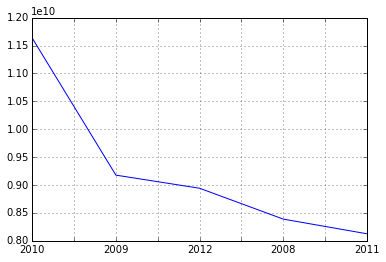

In [268]:
yearly = data.groupby(year)

per_year = yearly["amount"].sum()
print per_year.order(ascending=False).head(5)

%matplotlib inline
per_year.order(ascending=False).head(5).plot()

Ahora los 5 años con menos ayuda internacional

1976tq    147532287
1960      365188605
1969      675446372
1959      749872151
1981      814182381
Name: amount, dtype: int64


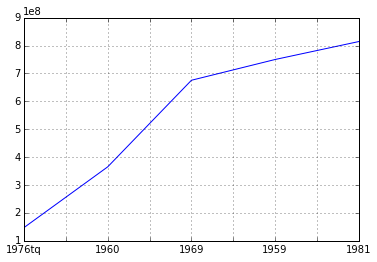

In [267]:
yearly = data.groupby(year)

per_year = yearly["amount"].sum()
print per_year.order().head(5)

%matplotlib inline
per_year.order().head(5).plot()

### 2.3 Descargar la información de aparcamientos del gobierno de UK: http://data.gov.uk/dataset/car-parks

Obtenemos la informacion

In [285]:
from urllib import urlretrieve
link = 'https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/388117/IF064_052_201412160800.zip'
urlretrieve(link, "car-parks.zip")

import os, zipfile
os.mkdir('car-parks')
with zipfile.ZipFile('car-parks.zip') as zip:
    zip.extractall('car-parks')

os.remove('car-parks.zip')

Parseamos uno de los ficheros XML

In [299]:
from lxml import objectify
parsed = objectify.parse('car-parks/CarParkData_1.xml')
root = parsed.getroot()

print root.tag
print root.attrib
print root.countchildren()

name=[]
location=[]
spaces=[]
for row in root.CarPark:
    name.append(row.CarParkName.text)
    location.append(row.Location.text)
    spaces.append(row.CarParkAdditionalData.CarParkSpace.NumberOfSpaces.text)
print len(name), len(location), len(spaces)

{http://www.transportdirect.info/carparking}CarParkDataImport
{'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.transportdirect.info/carparking B:/CODE/carparks/CarParking.xsd'}
1771
1771 1771 1771


Importamos la informacion en un DataFrame

In [305]:
import pandas as pd
data = pd.DataFrame()
data['name'] = name
data['location'] = location
data['spaces'] = spaces

# Always remember to check types and convert if needed:
print type(data['spaces'][0])
data['spaces'] = pd.Series(spaces, dtype="int32")
print type(data['spaces'][0])

data.head(5)

<type 'str'>
<type 'numpy.int32'>


,name,location,spaces
0,Nunnery Lane,York,193
1,Peel Street,York,77
2,Bath Street,Aberystwyth,26
3,Lower Park Avenue,Aberystwyth,90
4,Maesyrafon,Aberystwyth,88


### 2.4 Obtener la estadística de parkings por ubicación. Nota: está en el element Location pero solamente cuando está directamente bajo el elemento CarPark.

In [314]:
data.groupby(['location'])['location'].count().order(ascending=False).head(10)

location
Birmingham      41
Guildford       27
Crewe           27
Exeter          24
Bournemouth     21
Swansea         20
Huddersfield    19
Morecambe       19
Canterbury      19
Yeovil          18
Name: location, dtype: int64

Mostramos solo los 10 primeros resultados por conveniencia

## 3. Scrapping

### 3.1 Tema libre, tomar una página Web con contenido tabular que combine cadenas y números y tratar de moverlo a un DataFrame.

Como ejemplo voy a Scrappear el portal de empleo Infojobs. Para este ejercicio y dado el volumen de trabajo que tenemos, no voy a resolver temas como la paginacion o el paso de valores por POST. Los resultados obtenidos, equivalen a realizar una busqueda en el portal sin parametros.

In [1]:
import requests
url = "https://www.infojobs.net/jobsearch/search-results/list.xhtml"
page = requests.get(url)

#### Una vez que hemos comprobado el acceso a la pagina, recuperamos los contenidos de la misma.

In [2]:
from lxml import html,etree
from io import StringIO, BytesIO

parser = etree.HTMLParser()
tree   = etree.parse(StringIO(page.text), parser)

result = etree.tostring(tree.getroot(), pretty_print=True, method="html")
print(result)

<html xmlns:fb="http://ogp.me/ns/fb#" lang="es">
<head data-page-config='{"site":"http://www.infojobs.net","xitiPortalLevelTwo":1,"staticPath":"//es-static0.infojobs.com","portalImgPath":"//media.infojobs.net/portales/ij/","currentLocale":"es","requestId":"de602e94-1abf-4787-8453-09691289f420","xitiPortalLevelOne":463787,"basePortal":0}'>
<meta charset="ISO-8859-15">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">
<link rel="publisher" href="https://google.com/+infojobs">
<link rel="prefetch" href="//media.infojobs.net/appgrade/backgrounds/bg-logo-claim-empleo.svg">

<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"Ug8GVVFRGwcHUlBQDgI="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o?o:e)},o,o.exports)}return e[n].exports}if("fu

#### Definimos una serie de funciones a medida para poder parsear la pagina

In [3]:
import re

# Funcion para transformar los datos de Strings lxml a Strings unicode
def to_string(L):
    R = []
    for E in L:
        R.append(E.encode('utf8'))
    return R
 
# Funcion para recorrer la lista de detalles que contiene el tipo de contrato, horario y salario
def parse_details(details):
    contract = []
    hours = []
    salary = []
    for i in range(0, len(details)):
        cells = details[i].getchildren()

        if len(cells) == 3:
            contract.append(cells[0].text)
            hours.append(cells[1].text)
            salary.append(cells[2].text)
        elif len(cells) == 2:
            contract.append(cells[0].text)
            hours.append('')
            salary.append(cells[1].text)
        else:
            print('WTF!')
            
    return contract, hours, salary

# Funcion para transformar el salario en un valor numerico
def parse_min_max_salary(salary):
    min_salary = []
    max_salary = []
    salary_rate = []
    for i in range(0, len(salary)):
        words = salary[i].split(" ")
        #print words
        # Loop and print each city name.
        rate = 'Sin determinar'
        min = 99999
        max = 0
        for w in words:
            if "/"  in w:
                rate = w
                
            n = str(re.sub(r"\D", "", w))
            if n.isdigit():
                n = int(n)
                if n < min:
                    min = n
                if n > max:
                    max = n

        if min == 99999:
            min = 0
        
        min_salary.append(min)
        max_salary.append(max)
        salary_rate.append(rate)
    
    salary_rate = to_string(salary_rate)
    return min_salary, max_salary, salary_rate

# Funcion para mostrar la informacion previa inclusion en un DataFrame
def print_jobs(title, organization, location, description, contract, hours, min_salary, max_salary, salary_rate):
    print 'Ofertas de trabajo\n'
    for i in range(0,len(title)):  
        print 'Oferta %d' % (i+1)
        print
        print 'Puesto: ' + title[i]
        print 'Organizacion: ' + organization[i]
        print 'Lugar: ' + location[i]
        print 'Descripcion: ' + description[i]
        print 'Tipo de Contrato: ' + contract[i]
        print 'Jornada: ' + hours[i]
        print 'Salario minimo: %d' % min_salary[i]
        print 'Salario maximo: %d' % max_salary[i]
        print 'Tipo de salario : ' + salary_rate[i]
        print

#### Procedemos a parsear la pagina. 

Logicamente, debemos explorar primero la estructura en un editor de texto o en el navegador con F12 para ver como hay que recorrer el arbol DOM. Haciendo uso de xpath, resulta sencillo acceder a las etiquetas de interes para recoger los elementos que deseamos.

In [4]:
title = to_string(tree.xpath("//span[@itemprop='title']//text()"))
organization = to_string(tree.xpath("//span[@itemprop='name']//text()"))
location = to_string(tree.xpath("//span[@itemprop='jobLocation']//text()"))
description = to_string(tree.xpath("//p[@itemprop='description']//text()"))

details = tree.xpath("//ul[@class='tag-group hide-small-device']")
        
contract, hours, salary = parse_details(details)
min_salary, max_salary, salary_rate = parse_min_max_salary(salary)
print_jobs(title, organization, location, description, contract, hours, min_salary, max_salary, salary_rate)

Ofertas de trabajo

Oferta 1

Puesto: Jefe de cocina rte tapas cocina vasca Ref  ASN
Organizacion: A.S.N. SELECCION Y RRHH, S.L.
Lugar: Barcelona
Descripcion: Restaurante del centro de Barcelona de tapitas, raciones, montaditos vascos... perteneciente a consolidado grupo lde restauración precisa incorporar jefe de cocina.
Se ofrece horario partido, 2 días de fiesta, contrato indefinido .
Sueldo fijo más variable.
Promoción interna dentro de la empresa.
Incorporación inmediiata
Tipo de Contrato: Contrato indefinido
Jornada: Jornada completa
Salario minimo: 30000
Salario maximo: 39000
Tipo de salario : Bruto/año

Oferta 2

Puesto: 7 Camareros/as jornada  completa y media Ref ASN
Organizacion: A.S.N. SELECCION Y RRHH, S.L.
Lugar: Barcelona
Descripcion: Grupo de restaurantes de   Barcelona centro precisa incorporar 7 camareros,  3 camareros camareras y ayudantes de camarero a jornada completa y 4 a media  jornada en horario flexible.
Formación y promoción interna.
Contrato de 40 y de 20 ho

#### Volcamos la informacion en un DataFrame

Es necesario fijar el encoding a utf-8 o no podemos importar sin error la informacion en un DataFrame

In [7]:
import sys  
reload(sys)
sys.setdefaultencoding('utf8')

Importamos la informacion

In [10]:
import pandas as pd
data = pd.DataFrame()
data['title'] = title
data['organization'] = organization
data['location'] = location
data['description'] = description
data['contract'] = contract
data['hours'] = hours
data['min_salary'] = min_salary
data['max_salary'] = max_salary
data['salary_rate'] = salary_rate

data.head(5)

,title,organization,location,description,contract,hours,min_salary,max_salary,salary_rate
0,Jefe de cocina rte tapas cocina vasca Ref ASN,"A.S.N. SELECCION Y RRHH, S.L.",Barcelona,Restaurante del centro de Barcelona de tapitas...,Contrato indefinido,Jornada completa,30000,39000,Bruto/año
1,7 Camareros/as jornada completa y media Ref ASN,"A.S.N. SELECCION Y RRHH, S.L.",Barcelona,Grupo de restaurantes de Barcelona centro pr...,Contrato indefinido,Jornada indiferente,900,1500,Bruto/mes
2,Ayudantes de cocina jornada completa y media ...,"A.S.N. SELECCION Y RRHH, S.L.",Barcelona,Grupo de Restauración de cocina catalana y med...,Contrato indefinido,Jornada indiferente,900,1500,Bruto/mes
3,Técnico de Selección IT. Incorporación inmediata.,Computer Space,Boadilla Del Monte,DESCRIPCIÓN GENERAL\r\nImportante empresa del ...,Contrato indefinido,,18000,24000,Bruto/año
4,Azafato/a de eventos,V & C NEW THECHNOLOGY S.L,Malaga,"Empresa líder en el sector, busca personal par...",Contrato indefinido,Jornada completa,15000,21000,Bruto/año


#### Ejecutamos una busqueda sobre el DataFrame

In [9]:
data.loc[data['location'] == 'Madrid'].sort(['max_salary','min_salary'], ascending=[False,False]).head(5)

,title,organization,location,description,contract,hours,min_salary,max_salary,salary_rate
20,Director de ventas - brokers seguros,S4 Soluciones Empresariales S.L.,Madrid,Impulsar la apertura de nuevas cuentas y merca...,Contrato indefinido,Jornada completa,18000,48000,Bruto/año
16,URGE (Lunes-Viernes): Promotor Comercial (Alta...,DAROC,Madrid,Seleccionamos 5 jóvenes de manera inmediata pa...,Contrato de duración determinada,Jornada completa,0,0,Sin determinar


Mision cumplida!!

## 4. Trabajando con APIs

### 4.1 Utilizando bucles y teniendo en cuenta que en las propias respuestas del API nos indica datos de paginación, capturar todos los datos de AngelList.

In [5]:
print agenda.sort(['Apellido'], ascending=[1])

        Numero   Nombre Apellido      Ciudad
3  626 453 789    David   Balade   Barcelona
0  656 447 008   Javier    Lopez      Madrid
2  628 410 477    Julia     Moya  Pontevedra
1  646 133 100  Alberto    Ramos      Madrid


### 4.2 Analizar los salarios que ofrecen las startups de AngelList.

In [12]:
print agenda.groupby(['Ciudad'])['Ciudad'].count()

Ciudad
Barcelona     1
Madrid        2
Pontevedra    1
Name: Ciudad, dtype: int64


### 4.3 Buscar las startups que tienen más followers y dibujar una distribución del número de followers. Puede utilizarse la llamada del API: GET /startups?filter=raising

In [13]:
print agenda.loc[agenda['Ciudad'] == 'Barcelona']

        Numero Nombre Apellido     Ciudad
3  626 453 789  David   Balade  Barcelona


## 5. SQL en Python

### 5.1 Crear una base de datos para modelar la app Wallapop e insertar algunos datos de ejemplo. Hacer consultas con SQL que impliquen a más de una tabla.

In [15]:
calendario = calendario.set_index(["Fecha"])
print calendario

             Hora   Nombre Apellido    Motivo    Lugar
Fecha                                                 
2015-03-01  12:00   Javier    Lopez  Negocios   Madrid
2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
2015-08-10  16:00    David   Balade      Ocio   Toledo
2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


### 5.2 Cargar datos con SQL en un DataFrame de pandas

In [16]:
print calendario[((calendario.index > '2015-06-01') & (calendario.index < '2015-06-30')) | ((calendario.index > '2015-08-01') & (calendario.index < '2015-08-31'))]

             Hora   Nombre Apellido    Motivo    Lugar
Fecha                                                 
2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
2015-08-10  16:00    David   Balade      Ocio   Toledo
2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


- Trabajo realizado por: Alfonso Campos